## 共享单车数据分析代码
1. 数据集查看模块
2. 数据集处理模块
3. 数据集清洗模块
4. 数据集分析/可视化模块


### 1.数据集读取/查看模块
调用所需要用到的库

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns #用于可视化的库
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime


读取相关数据，以待下一步进行处理

---
**数据集中的列属性说明:**

datetime - 每小时日期 + 时间戳  

season -  1 = 春季, 2 = 夏季, 3 = 秋季, 4 = 冬季 

holiday - 是否为假日

workingday - 是否为工作日（既不是周末也不是假日）

weather - 1: 晴天, 少量云, 部分多云, 部分多云 

2: 薄雾 + 多云, 薄雾 + 碎云, 薄雾 + 少量云, 薄雾 

3: 小雪, 小雨 + 雷暴 + 零星云, 小雨 + 零星云

4: 大雨 + 冰雹 + 雷暴 + 薄雾, 雪 + 雾 

temp - 摄氏温度

atemp - "体感" 温度（摄氏度）

humidity - 相对湿度

windspeed - 风速

casual - 非注册用户租赁数量

registered - 注册用户租赁数量

count - 总租赁数量

In [4]:
#加载训练数据和测试数据集
df = pd.read_csv('./train.csv')

In [5]:
#查看数据集大小
np.shape(df)

(10886, 12)

In [6]:
#简单查看数据集的情况
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
#查看训练数据集每列的数据类型和数据值的数量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 2.数据集处理模块
主要是对时间数据datetime的处理

**（1）时间处理**

方法一：使用pd自带的函数进行处理

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

def extract_feature(df):
    df["year"] = df['datetime'].dt.year
    df["month"] = df['datetime'].dt.month
    df["day"] = df['datetime'].dt.day
    df['weekday'] = df['datetime'].dt.dayofweek
    df["hour"] = df['datetime'].dt.hour
    
extract_feature(df)   

In [9]:
# 变换数字到英文星期
def number_to_day_of_week(number):
    days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    if 0 <= number < len(days):
        return days[number]
    else:
        return None  # 或者返回其他默认值
    
df['weekday'] = df['weekday'].apply(number_to_day_of_week)
   

方法二：使用分词函数进行处理

！！请注意，两种方法只能运行一种，否则会矛盾报错

In [50]:
#使用 split 函数将 datetime 属性拆分为年-月-日 和 时间
df['tempDate'] = df.datetime.apply(lambda x:x.split())

#使用拆分出的 tempDate 提取出年-月-日，从中提取 year, month, day 和 weekday 列。
df['year'] = df.tempDate.apply(lambda x:x[0].split('-')[0])
df['month'] = df.tempDate.apply(lambda x:x[0].split('-')[1])
df['day'] = df.tempDate.apply(lambda x:x[0].split('-')[2])
# weekday 使用 calendar 包和 datetime 包
df['weekday'] = df.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

df['hour'] = df.tempDate.apply(lambda x:x[1].split(':')[0])

#提取出的属性是字符串属性，因此需要转换为数值型数据。
df['year'] = pd.to_numeric(df.year,errors='coerce')
df['month'] = pd.to_numeric(df.month,errors='coerce')
df['day'] = pd.to_numeric(df.day,errors='coerce')
df['hour'] = pd.to_numeric(df.hour,errors='coerce')

AttributeError: 'Timestamp' object has no attribute 'split'

In [10]:
# 查看经过处理的数据集
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Friday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Friday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Friday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Friday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Friday,4


**（2）季节处理**

由于数据集对季节的错误估计（即1-3月算作春季），不符合实际

以下对数据集中关于季节的部分进行重新处理

In [11]:
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

df['season'] = df.month.apply(badToRight)

### 3.数据集清洗模块

### 4.数据分析/可视化模块

方法一：仅使用plt方法输出的可视图，定制化程度低

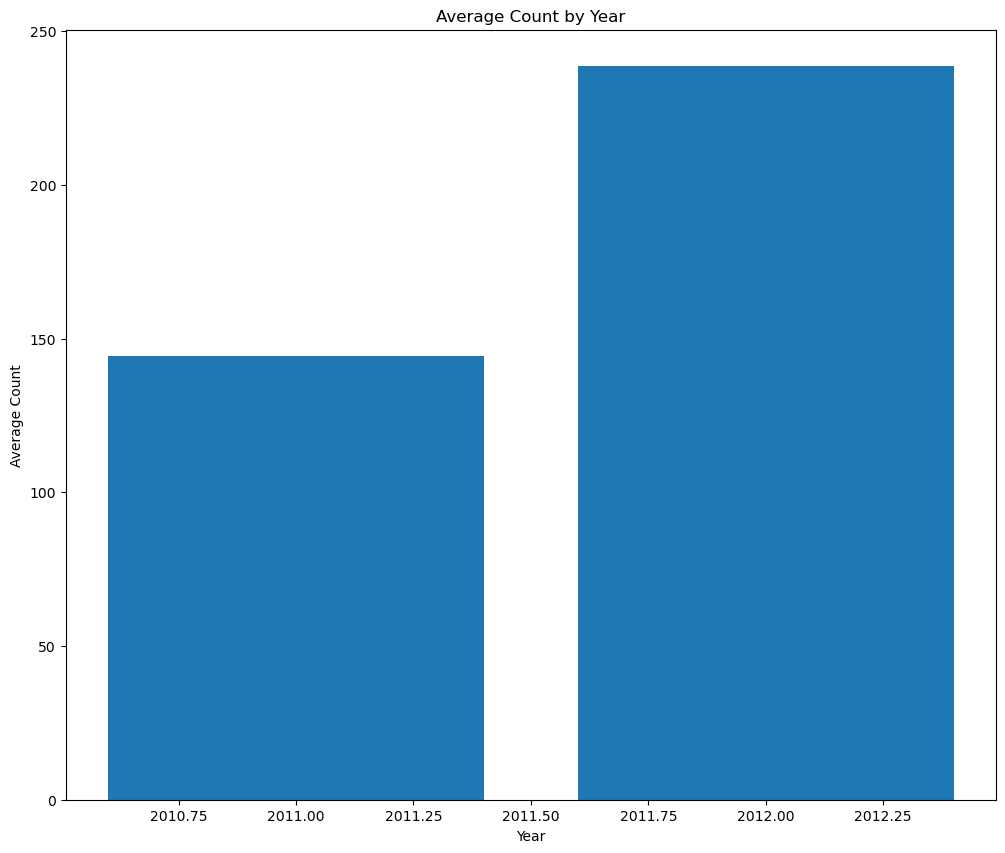

In [55]:
yearly_counts = df.groupby('year')['count'].mean().reset_index()

# 创建一个新的图形和子图
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.bar(yearly_counts['year'], yearly_counts['count'])

# 设置图表标题和坐标轴标签
ax1.set_title('Average Count by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Count')

# 显示图表
plt.show()

方法二：使用sns的输出形式，可定制化程度高，之后使用此方法输出

#### （1）可视图展示：借车数量与时间的关系

分析结论一：
1. 借车数量逐年增加
2. 夏天借车数量更多
3. 每天的借车数量基本相同
4. 每天凌晨和傍晚时的接车数量飙升

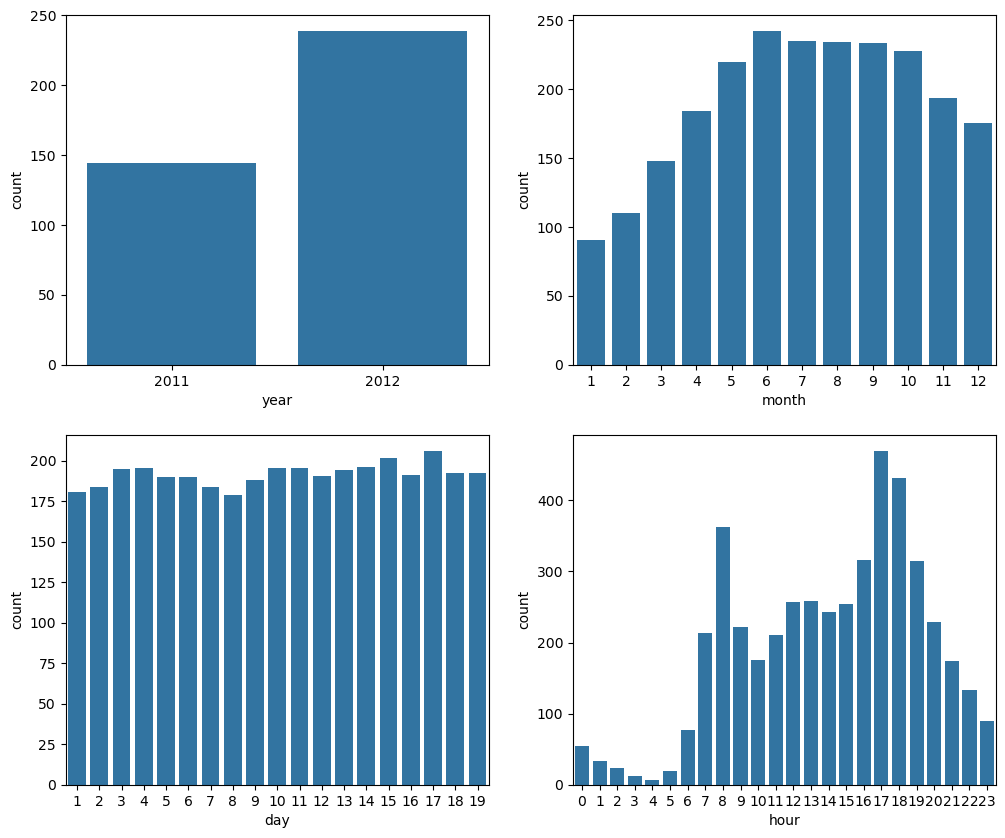

In [56]:
# 年份与 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=df.groupby('year')['count'].mean().reset_index())

# 月份与 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=df.groupby('month')['count'].mean().reset_index())

# 日期与 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=df.groupby('day')['count'].mean().reset_index())

# 小时与 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=df.groupby('hour')['count'].mean().reset_index())


#### （2）可视图展示：季节/假日/天气对借车数量的影响

分析结论二：
1. 夏季借车数量较多
2. 节假日和工作日借车数量基本相同
3. 天气晴朗时借车较多，天气对借车的影响较大

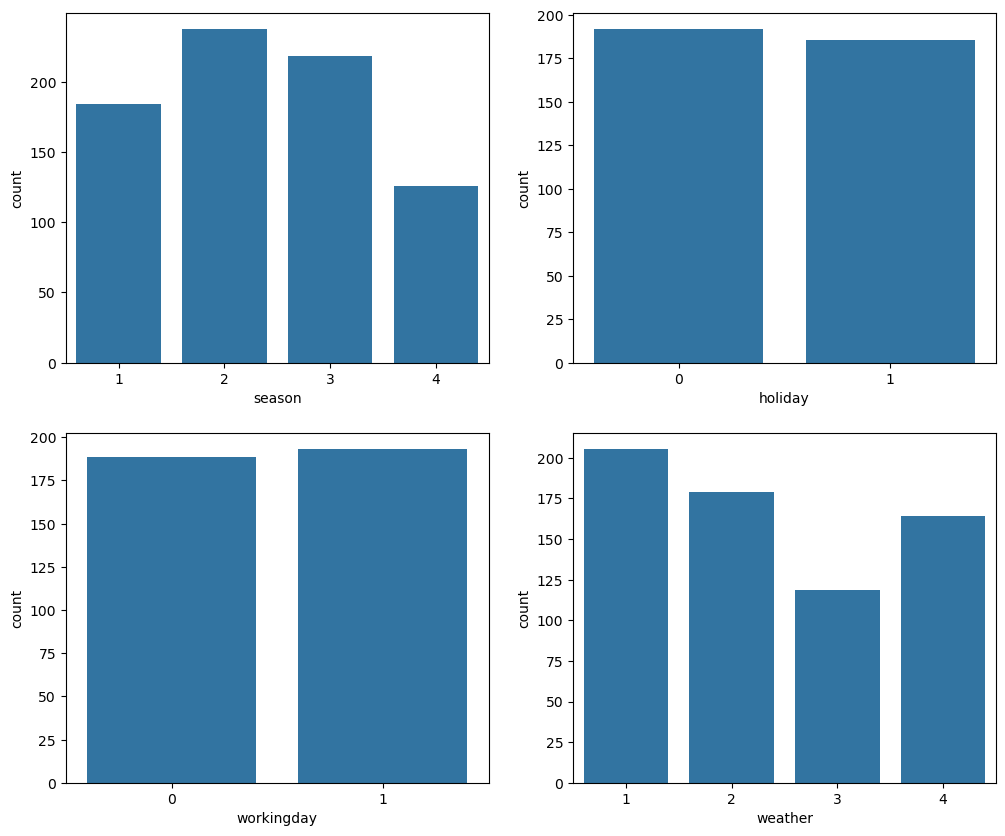

In [57]:
# 季节与 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=df.groupby('season')['count'].mean().reset_index())

# 假日与 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=df.groupby('holiday')['count'].mean().reset_index())

# 工作日与 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=df.groupby('workingday')['count'].mean().reset_index())

# 天气与 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=df.groupby('weather')['count'].mean().reset_index())


#### （3）可视图展示：温度/湿度/风速对借车数量的影响

分析结论三：
1. 温度对借车数量的影响模糊不定，在人体适宜温度（20度上下）时借车数量较多
2. 湿度偏高时借车数量较多
3. 大风天会影响借车数量，无风时借车较多

<Axes: xlabel='windspeed', ylabel='Count'>

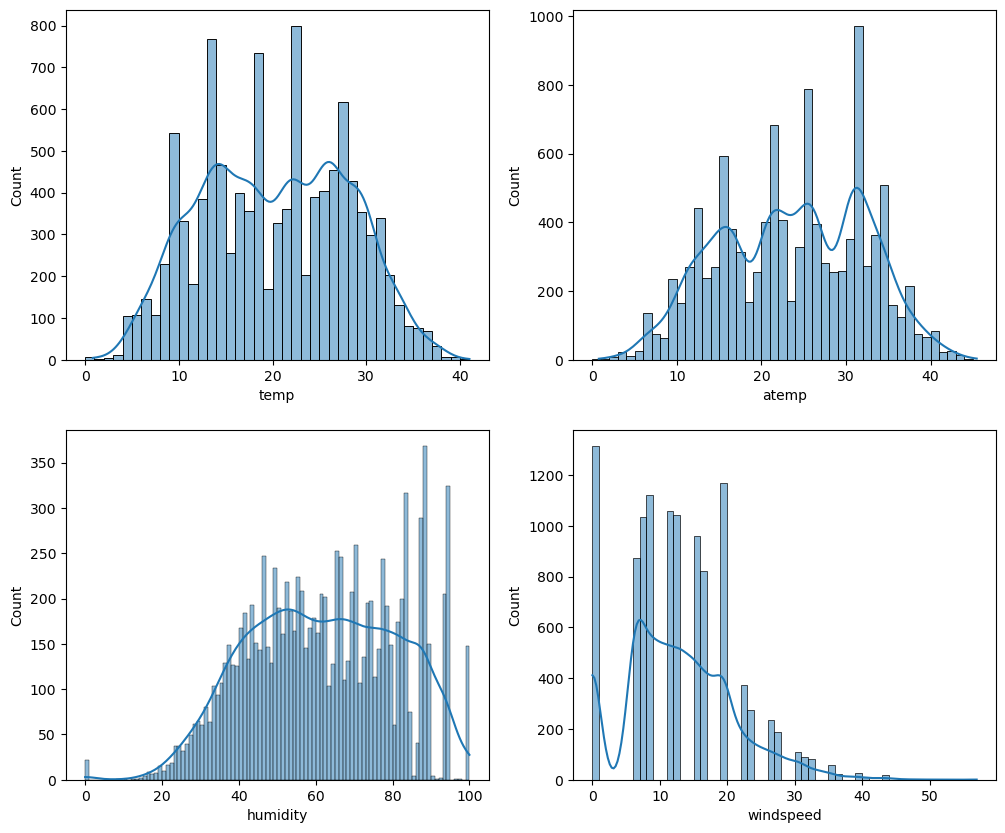

In [ ]:
# 创建一个新的figure实例
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 温度与 count
sns.histplot(data=df, x='temp', bins=range(int(df['temp'].min()), int(df['temp'].max())+1), kde=True, ax=axes[0, 0])

# 平均温度与 count
sns.histplot(data=df, x='atemp', bins=range(int(df['atemp'].min()), int(df['atemp'].max())+1), kde=True, ax=axes[0, 1])

# 湿度与 count
sns.histplot(data=df, x='humidity', bins=range(int(df['humidity'].min()), int(df['humidity'].max())+1), kde=True, ax=axes[1, 0])

# 风速与 count
sns.histplot(data=df, x='windspeed', bins=range(int(df['windspeed'].min()), int(df['windspeed'].max())+1), kde=True, ax=axes[1, 1])



#### （4）可视图展示：通过热图展示各列之间的相关系数

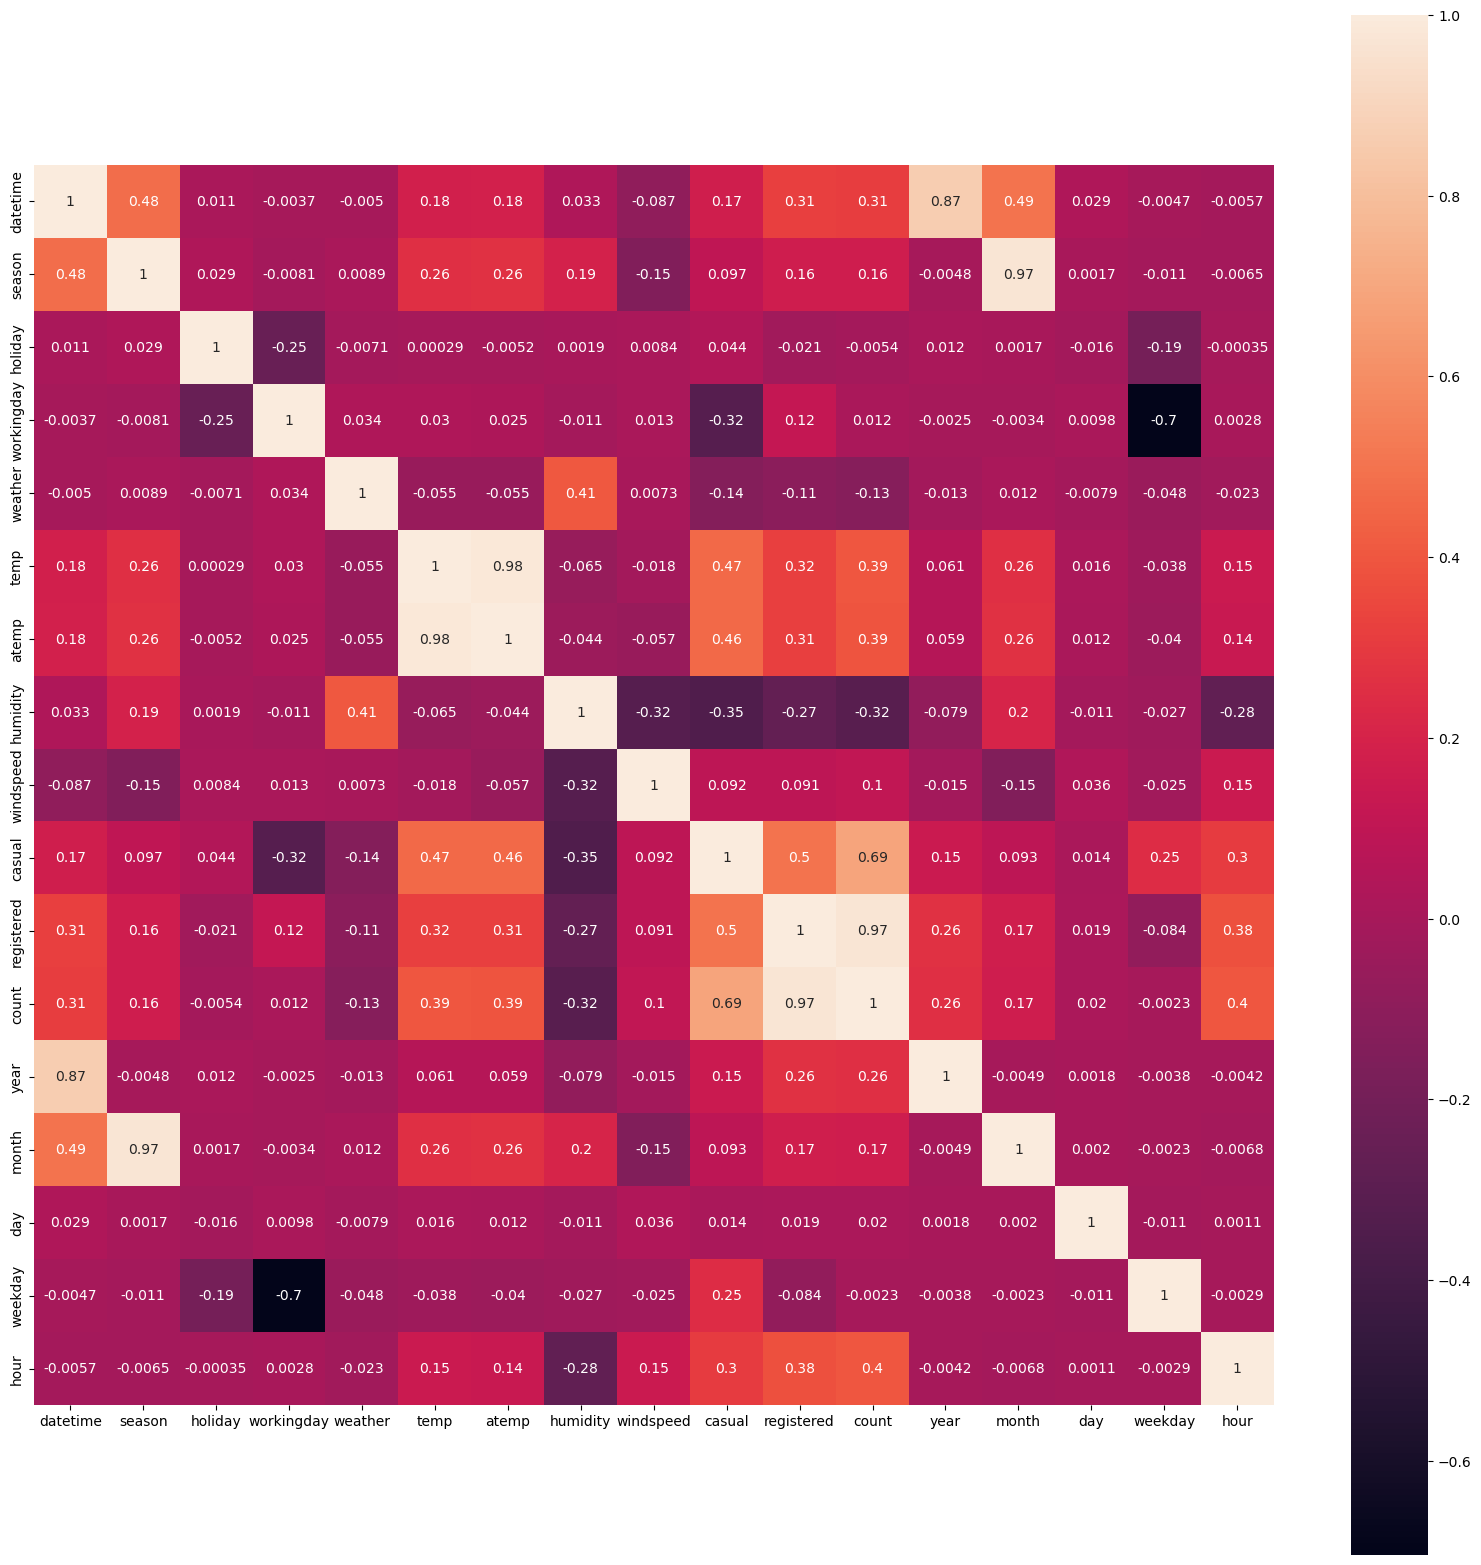

In [62]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(df.corr(),annot=True,square=True)

#### （4）可视图展示：展示两个不同列对借车数量的影响

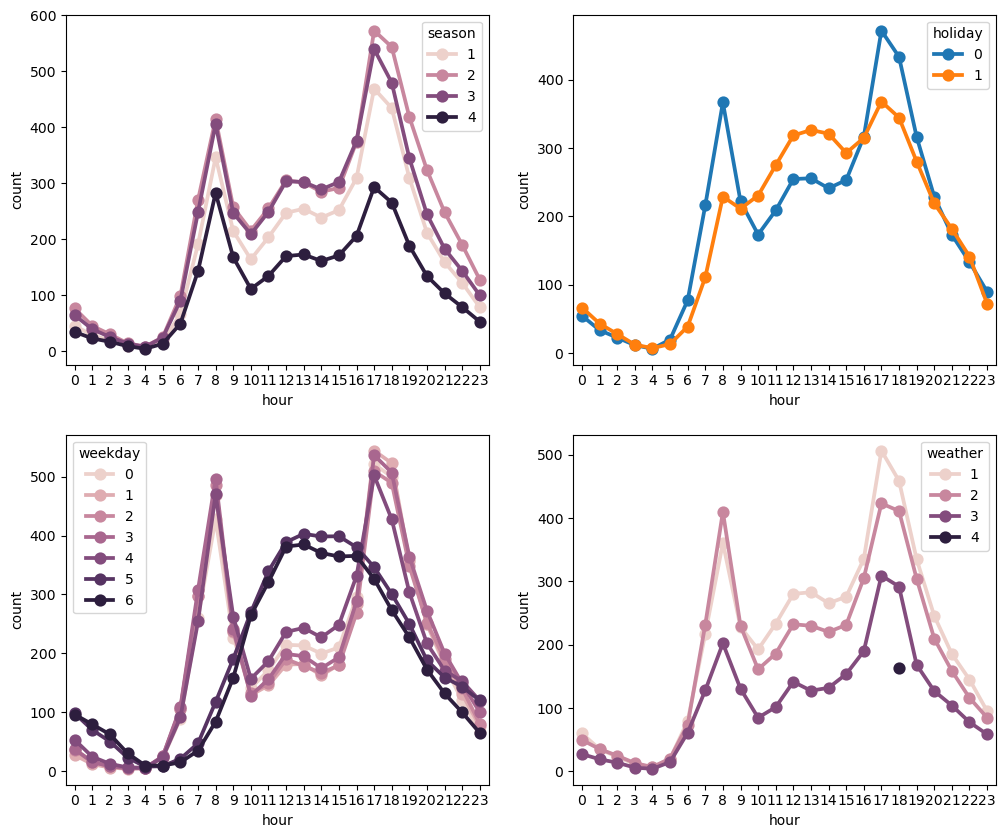

In [ ]:
# 时间和季节对 count 的影响
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=df.groupby(['season','hour'])['count'].mean().reset_index())

# 时间和假日对 count 的影响
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=df.groupby(['holiday','hour'])['count'].mean().reset_index())

# 时间和星期几对 count 的影响
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],data=df.groupby(['weekday','hour'])['count'].mean().reset_index())

# 时间和天气对 count 的影响
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=df.groupby(['weather','hour'])['count'].mean().reset_index())


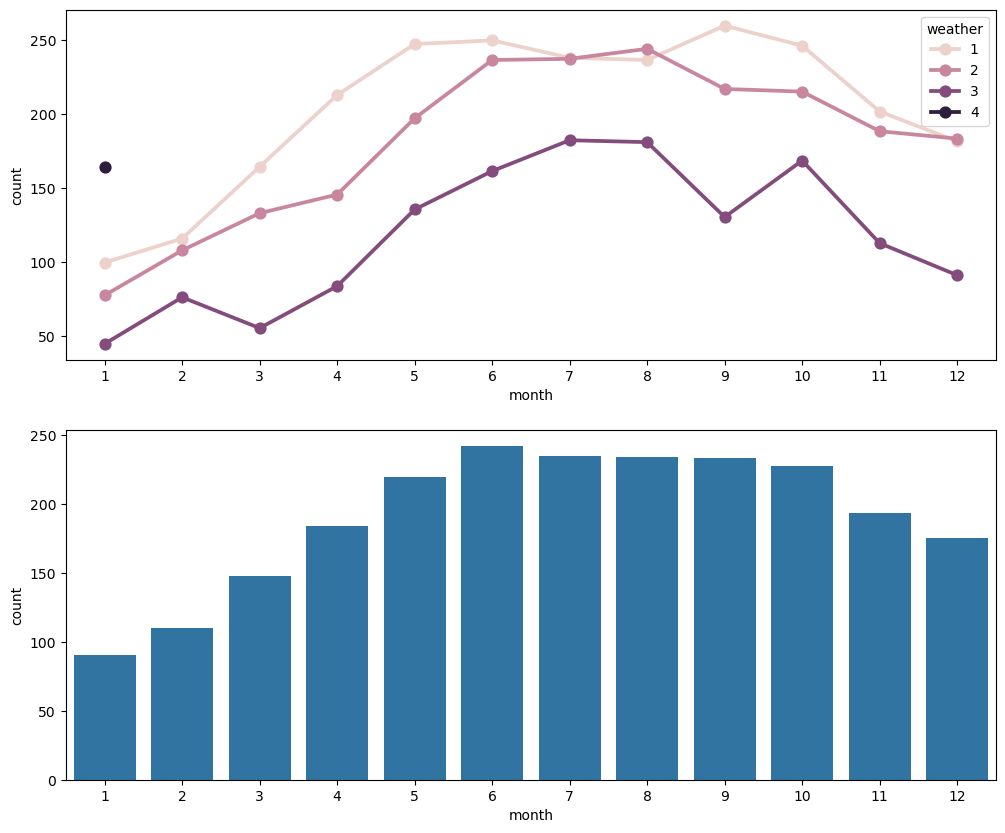

In [63]:
#月份和天气对 count 的影响
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=df.groupby(['weather','month'])['count'].mean().reset_index())

#每月 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=df.groupby('month')['count'].mean().reset_index())


#### （5）可视图展示：通过热图展示风速为零和不为零时各列之间分别的相关系数
分析：  
风速为零有两种情况——一种是真实为零，一种是设备故障导致为零  
因此假设不为零时的数据真实，则可以通过比较两张热力图中相关系数区别较大的情况来反向确定风速为零时的数据是否值得加入

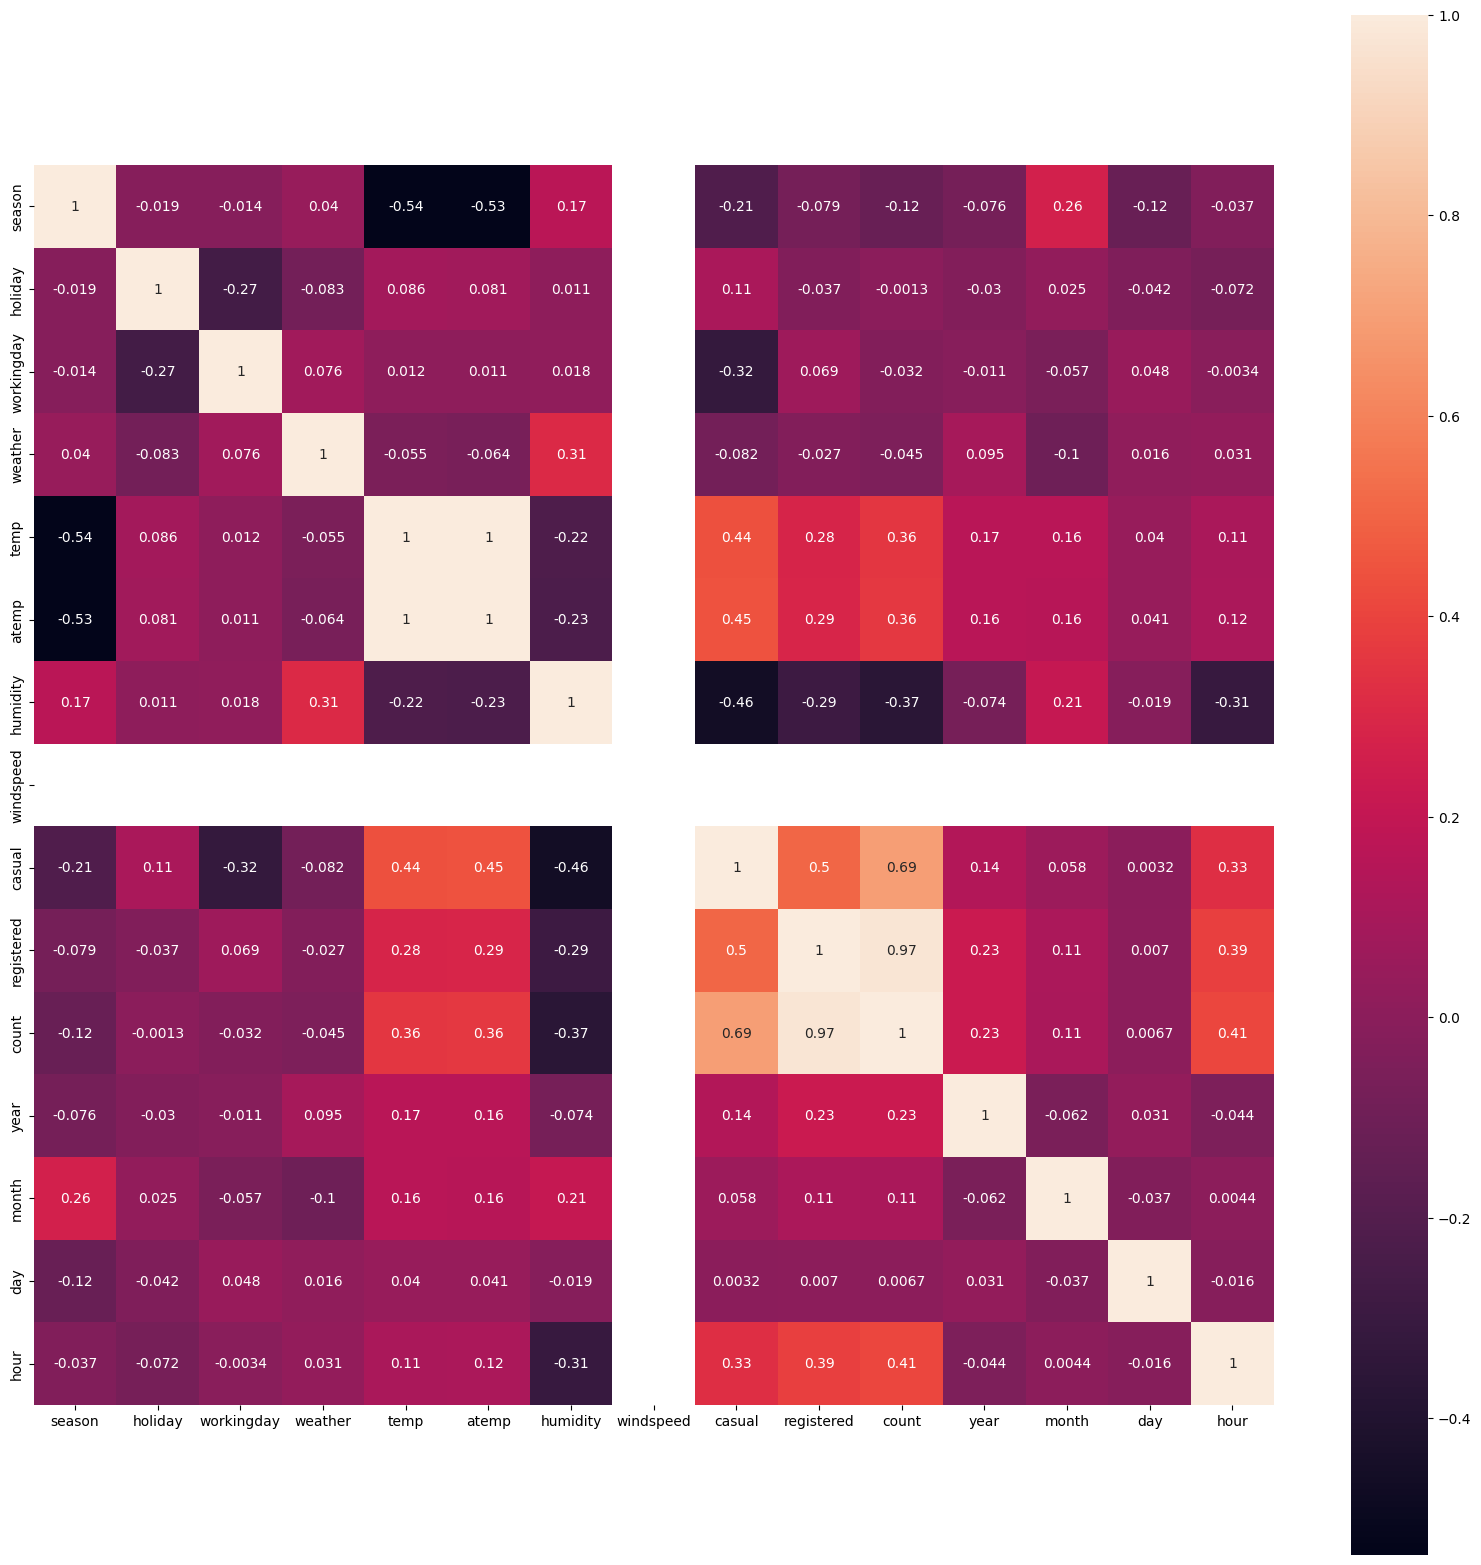

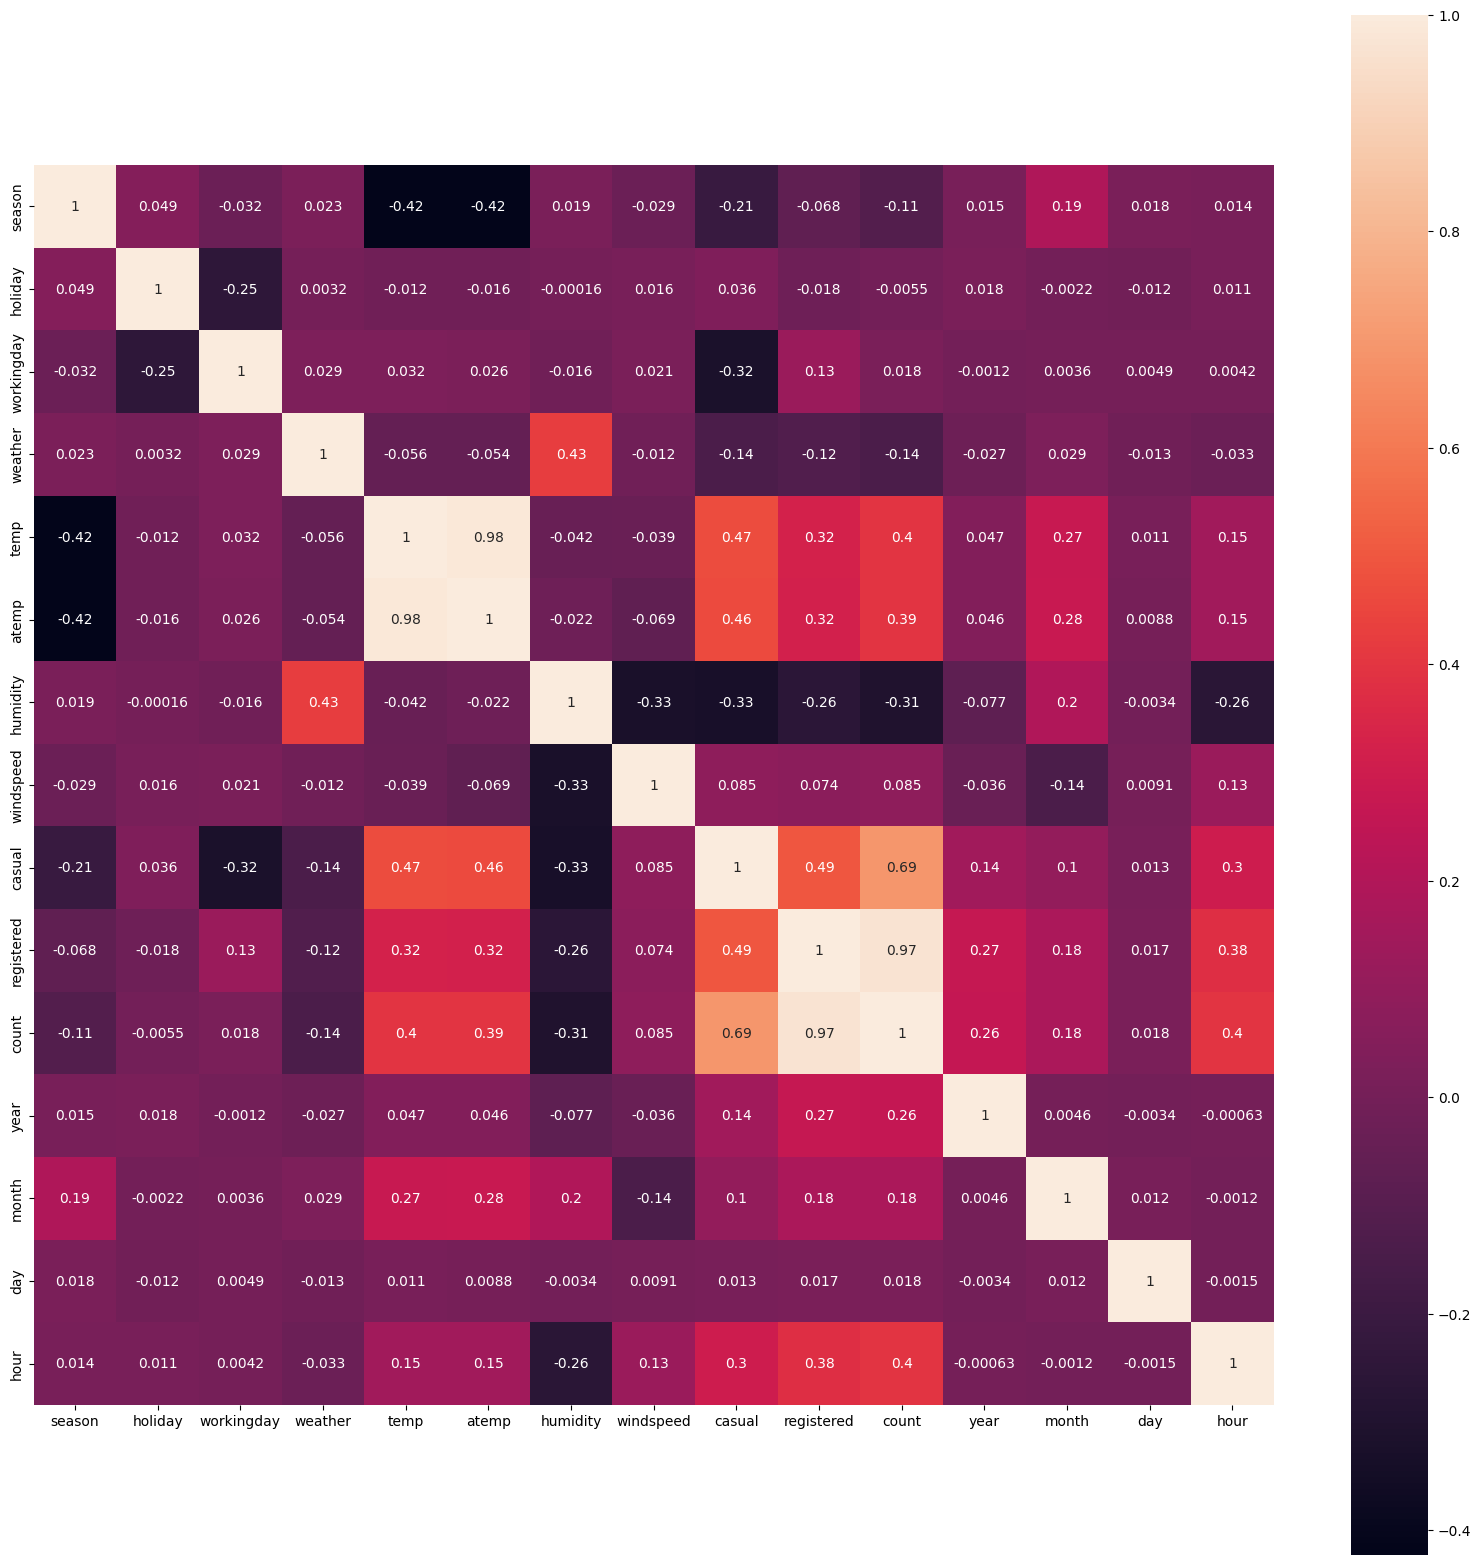

In [13]:
# 风速为0的数据集
windspeed_0 = df[df.windspeed == 0]
# 风速不为0的数据集
windspeed_Not0 = df[df.windspeed != 0]
#通过热图展示风速为零时各列之间的相关系数
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(windspeed_0.drop(columns=['datetime','weekday']).corr(),annot=True,square=True)
#通过热图展示风速不为零时各列之间的相关系数
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(windspeed_Not0.drop(columns=['datetime','weekday']).corr(),annot=True,square=True)